In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import requests

In [7]:
# Загрузка .json файла
df = pd.read_json('https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json')
print(df)

                  name  gt_corners  rb_corners       mean        max  \
0         Schlafzimmer           4           4   3.956313   8.562939   
1                Küche           4           4  23.019122  52.605437   
2             Bathroom           4           4   1.013833   1.950322   
3         Lounge/Diner           8           8   3.832620  18.236935   
4           Essbereich           4           4   8.017758  15.642853   
...                ...         ...         ...        ...        ...   
1342    Master Bedroom           4           4   1.739907   4.703960   
1343  Master Bedroom 2           4           4   0.530908   0.786997   
1344          Zimmer I           4           4   0.880569   1.221873   
1345  Hallway Bathroom           6           6  24.923452  64.266820   
1346         Bedroom 4           4           4   0.387328   0.762659   

           min  floor_mean  floor_max  floor_min  ceiling_mean  ceiling_max  \
0     0.274574    3.987864   8.562939   0.274574      3.

In [13]:
class PlotGenerator:
    def __init__(self):
        self.output_folder = 'charts'
        os.makedirs(self.output_folder, exist_ok=True)

    def draw_plots(self, json_url):
        try:
            response = requests.get(json_url)
            response.raise_for_status()
            data = response.json()
            df = pd.DataFrame(data)
        except requests.exceptions.RequestException as e:
            return f"Ошибка при загрузке JSON-файла: {str(e)}"

        plot_paths = []
        for column in df.columns:
            if df[column].dtype == 'int64' or df[column].dtype == 'float64':
                plt.figure(figsize=(8, 6))
                plt.plot(df[column])
                plt.title(f'График для столбца "{column}"')
                plt.xlabel('Индекс')
                plt.ylabel('Значение')
                plot_file_path = os.path.join(self.output_folder, f'{column}_plot.png')
                plt.savefig(plot_file_path)
                plot_paths.append(plot_file_path)
                plt.show()
                plt.close()

        return plot_paths

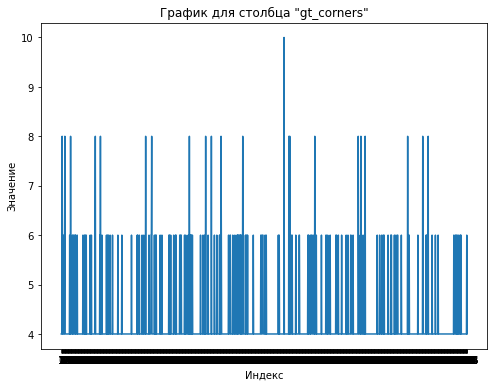

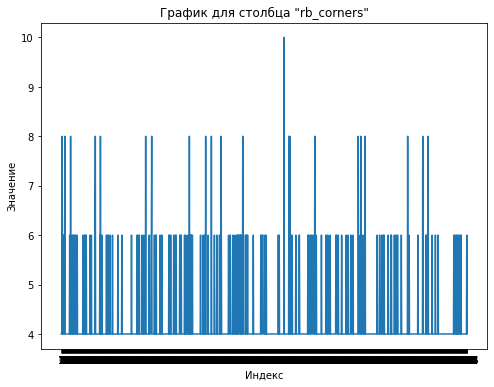

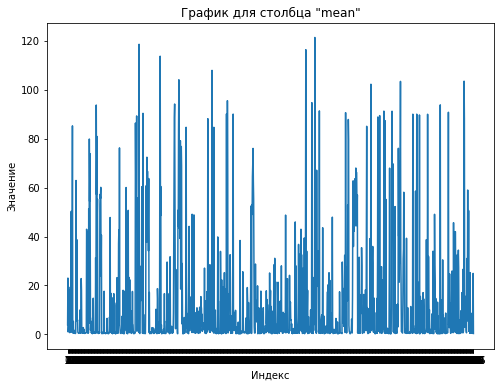

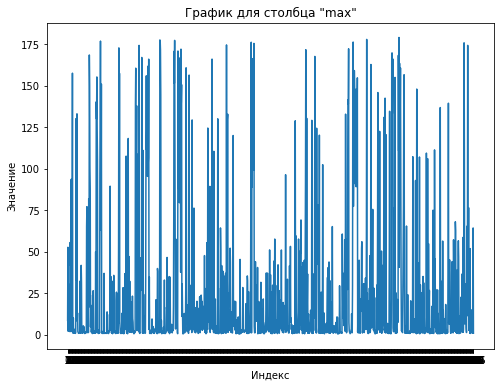

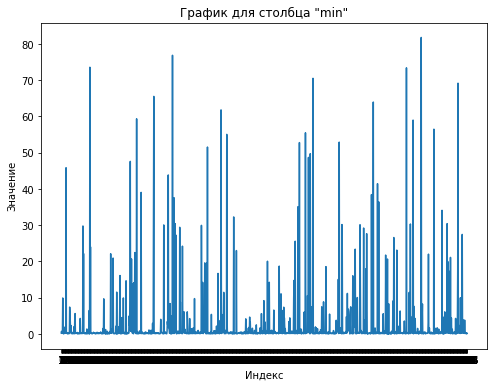

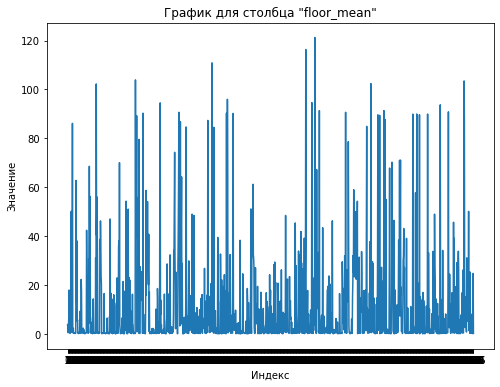

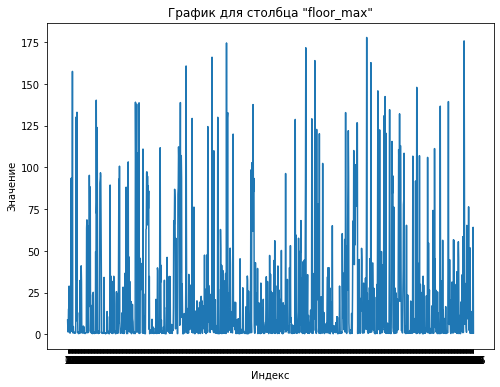

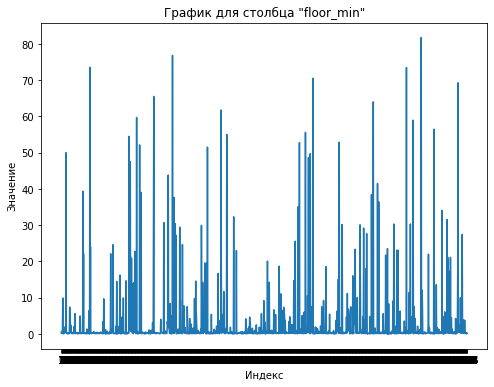

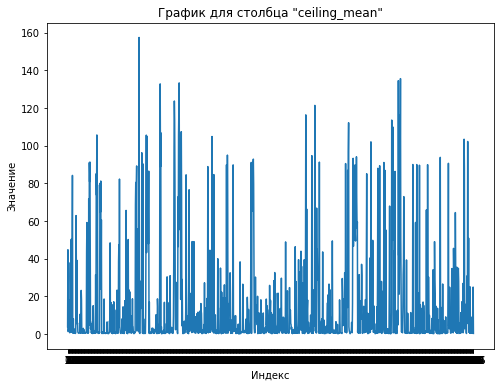

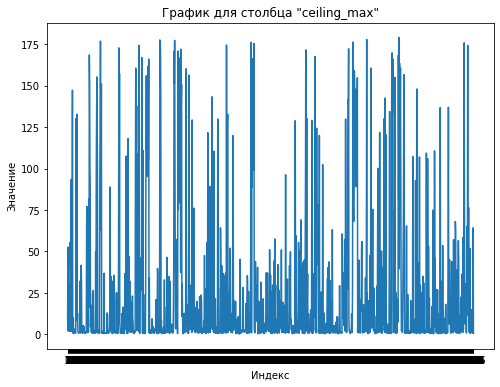

In [ ]:
plot_generator = PlotGenerator()
json_file_url = 'https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json'
plot_paths = plot_generator.draw_plots(json_file_url)

if plot_paths:
    print("Созданные графики сохранены в папке 'charts'. Пути к файлам:")
    for path in plot_paths:
        print(path)
else:
    print("Не удалось создать графики.")